In [19]:
# переменные
from credentials import config
SYM = "ETHUSDT"
PATH = r"D:\py_projects\binance\proj01\klines.json"
API_KEY = config.api_key
SECRET_KEY = config.secret_key
DEMA_SHORT = 20
DEMA_LONG = 50

In [20]:
# скачать свечи
import binance as bn
from jsondata import save_to_json
from binance.client import Client

client = bn.Client(API_KEY, SECRET_KEY)
klines = client.get_historical_klines(SYM, Client.KLINE_INTERVAL_1HOUR, "10 day ago UTC")
save_to_json(klines, PATH)


In [24]:
# функция
def convert_klines_to_dicts(klines):
    result = list()
    for kl in klines:
        kd = {
            "DateTime": datetime.fromtimestamp(kl[0] // 1000),
            "Open": float(kl[1]),
            "High": float(kl[2]),
            "Low": float(kl[3]),
            "Close": float(kl[4]),
            "Volume": float(kl[5]),
        }
        result.append(kd)
    return result

In [28]:
# загружаем данные
from jsondata import load_json_to_dict
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(convert_klines_to_dicts(klines))
# format = r'%Y-%m-%d %H:%M:%S'
# df = df.set_index(pd.DatetimeIndex(df['DateTime'])

In [29]:
def create_DEMA(df, time_period, column):
    EMA = df[column].ewm(span=time_period, adjust=False).mean()
    DEMA = 2 * EMA - EMA.ewm(span=time_period, adjust=False).mean()
    return DEMA

In [30]:
df["DEMA_short"] = create_DEMA(df, DEMA_SHORT, "Close")
df["DEMA_long"] = create_DEMA(df, DEMA_LONG, "Close")

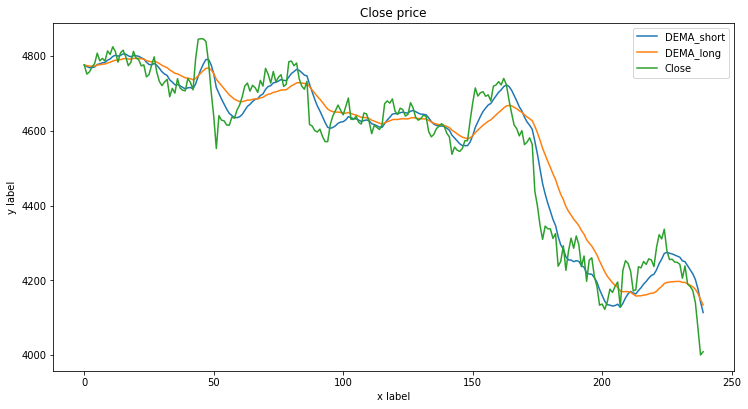

In [31]:
col_list = ["DEMA_short", "DEMA_long", "Close"]
df[col_list].plot(figsize=(12.2, 6.4))
plt.title("Close price")
plt.ylabel("y label")
plt.xlabel("x label")
plt.show()